In [1]:
import librosa
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment
from scipy import signal
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import tensorflow_io as tfio
import librosa.display
import IPython.display as ipd
import warnings
warnings.simplefilter("ignore", UserWarning)
from tensorflow.keras.callbacks import EarlyStopping
import random

2022-06-23 10:50:13.067365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 10:50:13.067392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.getcwd()

'/home/stud/m/mh361/share'

In [3]:
pathAudio = '/home/stud/m/mh361/share/sample-same/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
songa = []
songb = []
songc = []
for file in files:
    if "Holizna" in file:
        songa.append(file)
    if "Lounge_it" in file:
        songb.append(file)
    if "Tuesday" in file:
        songc.append(file)
filesa = sorted(songa, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesb = sorted(songb, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesc = sorted(songc, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesa = filesa[:-1]
filesb = filesb[:-1]
filesc = filesc[:-1]

files = filesa+filesb+filesc

In [4]:
#files

In [5]:
def normalize_sample(sample):
    array_of_samples = sample.get_array_of_samples()
    np_arr = np.array(array_of_samples)
    np_arr = np_arr.reshape(1, -1)
    return preprocessing.normalize(np_arr)

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


samples = []
samples_sec_canal = []
for file_name in files:
    x, sr = librosa.load(file_name, sr=44100)  
    normalized_sample = NormalizeData(x)
    #resampled_sample = signal.resample(normalized_sample, 44100)
    resampled_sample = signal.resample(normalized_sample, int(len(normalized_sample) / 10))
    samples.append(resampled_sample)


In [ ]:
#Play Audio File!!

##import IPython.display as ipd
##ipd.Audio(files[2])

In [ ]:
#example_x_train = samples[3]
#plt.plot(example_x_train)
#plt.show()

In [8]:
# Create first sequences with 4 samples in a row
X_train = []
Y_train = []
for i in range(len(samples)):   
    if i < len(samples)-6:
        Y_train.append(1)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(samples[i+3])
        z = first_sample + second_sample + third_sample + fourth_sample
        X_train.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_train.append(z)

In [9]:
#example_x_train = X_train[0]
#plt.plot(example_x_train)
#plt.show()

In [10]:
# Create second sequences with 4 samples in a row starting from second sample
for i in range(len(samples)):   
    if i < len(samples)-6:
        Y_train.append(1)
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(samples[i+3])
        fifth_sample = list(samples[i+4])
        z = second_sample + third_sample + fourth_sample + fifth_sample
        X_train.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_train.append(z)

In [ ]:
'''# Create first sequences with 3 samples + 1 skipped

for i in range(len(samples)):
    if i < len(samples)-6:
        Y_train.append(1)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fifth_sample = list(samples[i+4])
        z = first_sample + second_sample + third_sample + fifth_sample
        X_train.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_train.append(z)'''

In [ ]:
'''# Create sequence with 3 correct and 1 false sample in a row
X_false = []
Y_false = []
shuffled = samples

random.shuffle(shuffled)


for i in range(len(samples)):
    if i < len(samples)-6:   
        Y_false.append(0)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(shuffled[i]) 
        z = first_sample + second_sample + third_sample + fourth_sample
        X_false.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_false.append(z)     '''   

In [11]:
from numpy import random

X_false = []
Y_false = []


def get_strange_end_part(samples, current_index, max_len):
    x = random.randint(max_len)
    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):
        return samples[x]
    else:
        return get_strange_end_part(samples, current_index, max_len)

for i in range(len(samples)):   
    if i < len(samples)-6:
        Y_false.append(1)
        second_sample = list(samples[i+2])
        third_sample = list(samples[i+3])
        fourth_sample = list(samples[i+4])
        fifth_sample = list(samples[i+5])
        z = second_sample + third_sample + fourth_sample + fifth_sample
        X_false.append(z)


In [12]:
'''from numpy import random

X_false = []
Y_false = []


def get_strange_end_part(samples, current_index, max_len):
    x = random.randint(max_len)
    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):
        return samples[x]
    else:
        return get_strange_end_part(samples, current_index, max_len)


for i in range(len(samples)-6):
    Y_false.append(0)
    first_sample = list(samples[i])
    second_sample = list(samples[i+1])
    third_sample = list(samples[i+2])
    random_sample = get_strange_end_part(samples, i, len(samples))
    new_sample = first_sample + second_sample + third_sample + list(random_sample)
    X_false.append(new_sample)'''

'from numpy import random\n\nX_false = []\nY_false = []\n\n\ndef get_strange_end_part(samples, current_index, max_len):\n    x = random.randint(max_len)\n    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):\n        return samples[x]\n    else:\n        return get_strange_end_part(samples, current_index, max_len)\n\n\nfor i in range(len(samples)-6):\n    Y_false.append(0)\n    first_sample = list(samples[i])\n    second_sample = list(samples[i+1])\n    third_sample = list(samples[i+2])\n    random_sample = get_strange_end_part(samples, i, len(samples))\n    new_sample = first_sample + second_sample + third_sample + list(random_sample)\n    X_false.append(new_sample)'

In [13]:
#example_x_train = X_false[0]
#plt.plot(example_x_train)
#plt.show()

In [14]:
# Create more data with wrong sequences 1+3 sample ok, 2+4 bad
from numpy import random

for i in range(len(samples)-6):
    Y_false.append(0)
    first_sample = list(samples[i])
    second_sample = get_strange_end_part(samples, i+1, len(samples))
    third_sample =  get_strange_end_part(samples, i+2, len(samples))
    random_sample = get_strange_end_part(samples, i, len(samples))
    new_sample = first_sample + list(second_sample) + list(third_sample) + list(random_sample)
    X_false.append(new_sample)

In [ ]:
'''# Create sequence with false samples 
for i in range(len(samples)):
    if i < len(samples)-6:  
        Y_false.append(0)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(shuffled[i+6]) 
        z = first_sample + second_sample + third_sample + fourth_sample
        X_false.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_false.append(z)        '''

In [15]:
X_train_total = []
Y_train_total = []

X_train_total.append(X_train)
X_train_total.append(X_false)
Y_train_total.append(Y_train)
Y_train_total.append(Y_false)

In [20]:
print(len(Y_false))
#for a in Y_train_total:
#    print(len(a))

320


In [21]:
X_train_total = np.array(X_train_total)
X_train_total.shape

(2, 320, 52920)

In [22]:
Y_train_total = np.array(Y_train_total)
Y_train_total.shape

(2, 320)

In [23]:
X_train_total = X_train_total.reshape(-1, 52920 )
X_train_total.shape

(640, 52920)

In [24]:
Y_train_total = np.array(Y_train_total).reshape(-1, 1)
Y_train_total.shape

(640, 1)

In [25]:
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, input_shape=(52920, 1))) 
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Conv1D(filters=32, kernel_size=2, input_shape=(52920, 1))) 
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='sigmoid')) 
model.add(Dense(32))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  
model.summary()

2022-06-23 10:52:40.738701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 10:52:40.739026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-23 10:52:40.739209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-23 10:52:40.739386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-06-23 10:52:40.739572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52919, 64)         192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26459, 64)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 26458, 32)         4128      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13229, 32)        0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 13229, 32)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               8

In [ ]:
model.evaluate(X_train_total, Y_train_total)

In [26]:

model.fit(X_train_total, Y_train_total, epochs=2)

# 17 min

Epoch 1/2
20/20 [==============================] - 422s 21s/step - loss: 0.5957 - accuracy: 0.7219
Epoch 2/2
20/20 [==============================] - 423s 21s/step - loss: 0.5797 - accuracy: 0.7500


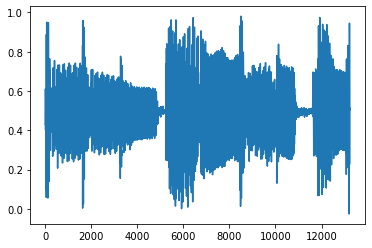

1/1 [==============================] - 0s 156ms/step


array([[0.7888427]], dtype=float32)

In [37]:
example_x_train = samples[5]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 13230   , 1)
model.predict(example_x_train)

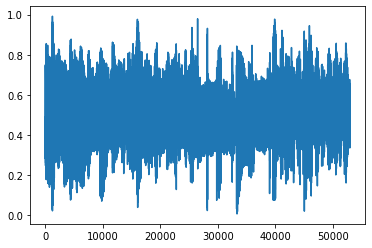

1/1 [==============================] - 1s 583ms/step


array([[0.7888031]], dtype=float32)

In [29]:
example_x_train = X_train_total[-2]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 52920  , 1)
model.predict(example_x_train)

In [ ]:
samples_sec_ch = np.array(samples_sec_canal)
full_song_sec_ch = []
for sample in samples_sec_ch:
    full_song_sec_ch.extend(sample)
second_channel_data = full_song_sec_ch[4000:6000]
plt.plot(second_channel_data)
plt.show()
second_channel_data = np.array(second_channel_data)
second_channel_data = second_channel_data.reshape(1, 2000)
model.predict(second_channel_data)

In [ ]:
extracted_sample = full_song_sec_ch[4000:6000]
new_start = extracted_sample[999:1999]
new_end = extracted_sample[0:1000]
switched_sample = new_start + new_end
plt.plot(switched_sample)
plt.show()
switched_sample = np.array(switched_sample)
switched_sample = switched_sample.reshape(1, 2000)
model.predict(switched_sample)

In [ ]:
reversed_sample = reversed_data[4000:6000]
plt.plot(reversed_sample)
plt.show()
reversed_sample = np.array(reversed_sample)
reversed_sample = reversed_sample.reshape(1, 2000)
model.predict(reversed_data)

In [ ]:
#filename = 'model_weights.h5'
#model.save(filename)